### **Project: Car Price Prediction for US Market Entry**


1. Introduction  
2. Goal of the Project  
3. Data Description  
4. Data Preprocessing  
5. Model Building  
   - Linear Regression  
   - Decision Tree  
   - Random Forest  
   - Gradient Boosting  
   - SVR  
6. Model Evaluation  
7. Feature Importance  
8. Hyperparameter Tuning  
9. Final Conclusion  

# 1.Introduction
### A Chinese car manufacturer is planning to enter the US market. They need insights into car pricing factors to competitively price their vehicles.


# 2.Goal of the Project
## To identify key factors influencing car prices and create regression models to predict prices accurately.

# 3.Data Description
## The dataset consists of various car features and their respective prices in the US market.

# 4.Data Loading and Preprocessing
###  1. Library Imports
Libraries are imported for data manipulation, visualization, model training, evaluation, and preprocessing.

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


### 2. Load Dataset
Loads the CSV file into a DataFrame.

In [40]:
df = pd.read_csv("CarPrice_Assignment.csv")

### 3. Initial Data Inspection
Provides insight into column data types and missing values.

In [41]:
print("Shape:", df.shape)
print("Info:")
df.info()
print(" Missing Values:")
print(df.isnull().sum())

Shape: (205, 26)
Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205

###  4. Duplicate Removal
Removes duplicate rows to avoid data skew.

In [42]:
df.drop_duplicates(inplace=True)

In [43]:
# Check unique values for doornumber and cylindernumber before conversion
print("\nUnique 'doornumber':", df['doornumber'].unique())
print("Unique 'cylindernumber':", df['cylindernumber'].unique())


Unique 'doornumber': ['two' 'four']
Unique 'cylindernumber': ['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']


### 5. Map Text Numbers to Integers
Converts textual numbers into actual integers (e.g., "four" → 4) for ML compatibility.

In [44]:
door_map = {'two': 2, 'four': 4}
cylinder_map = {'two':2, 'three':3, 'four':4, 'five':5, 'six':6, 'eight':8, 'twelve':12}
df['doornumber'] = df['doornumber'].map(door_map)
df['cylindernumber'] = df['cylindernumber'].map(cylinder_map)

### 6. Drop Irrelevant Columns
Drops ID and car name since they don't help with price prediction.

In [58]:
df.drop(['car_ID', 'CarName'], axis=1, inplace=True)

KeyError: "['car_ID', 'CarName'] not found in axis"


Skewness in numerical features:
enginelocation      8.143531
cylindernumber      2.817459
compressionratio    2.610862
enginesize          1.947655
price               1.777678
aspiration          1.673832
horsepower          1.405310
wheelbase           1.050214
carwidth            0.904003
curbweight          0.681398
citympg             0.663704
highwaympg          0.539997
symboling           0.211072
carlength           0.155954
peakrpm             0.075159
carheight           0.063123
boreratio           0.020156
drivewheel         -0.058352
fuelsystem         -0.242995
doornumber         -0.247552
enginetype         -0.535603
carbody            -0.665301
stroke             -0.689705
fueltype           -2.732619
dtype: float64


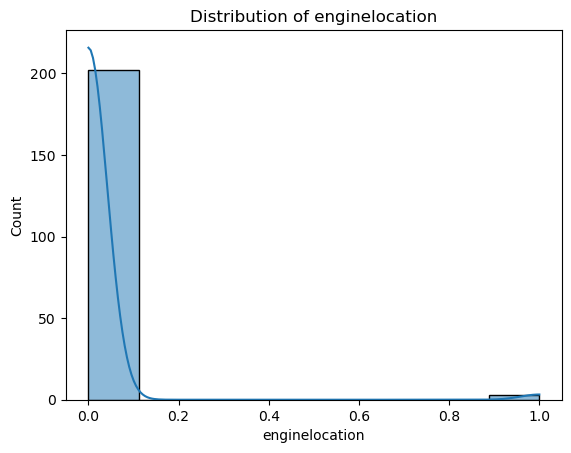

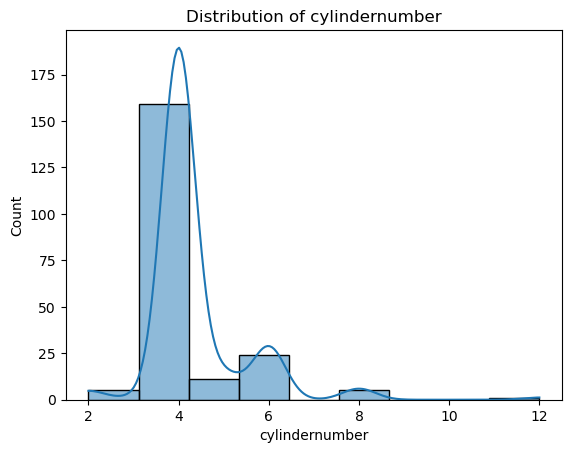

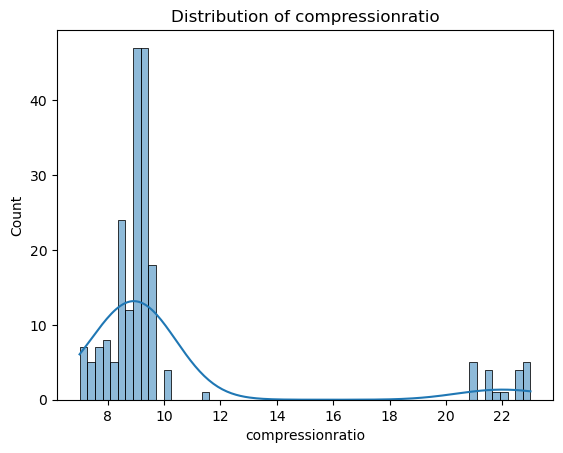

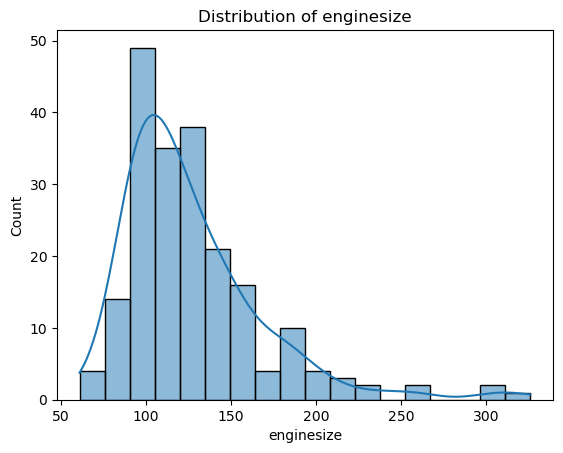

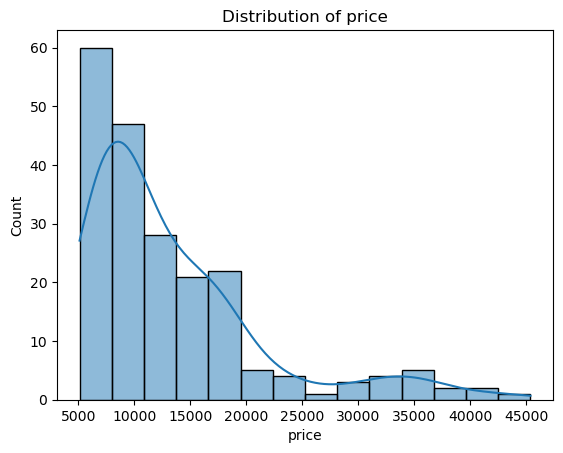

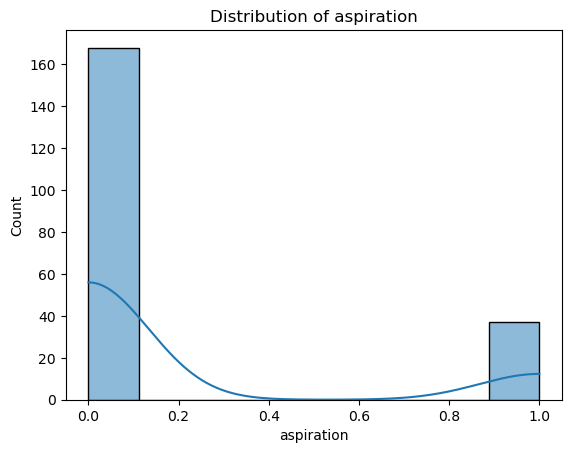

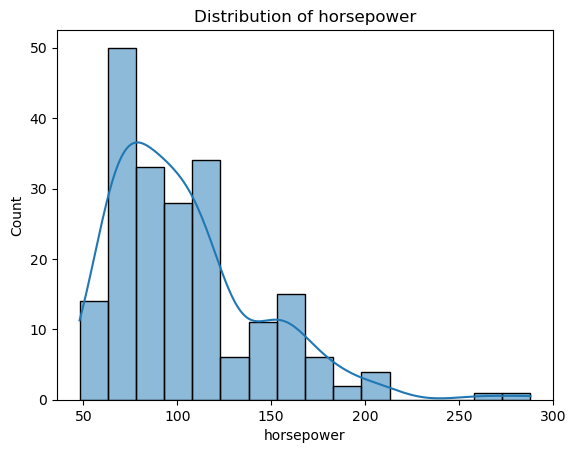

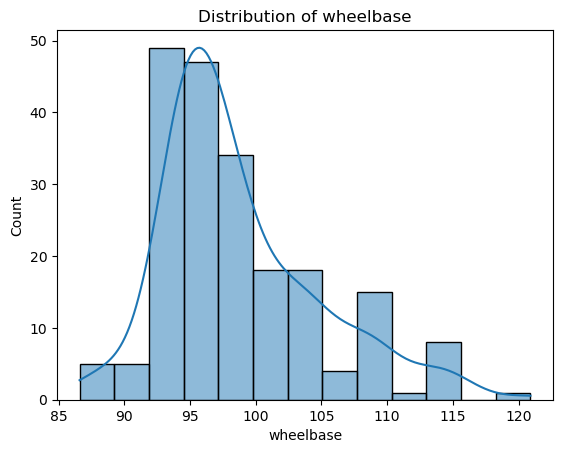

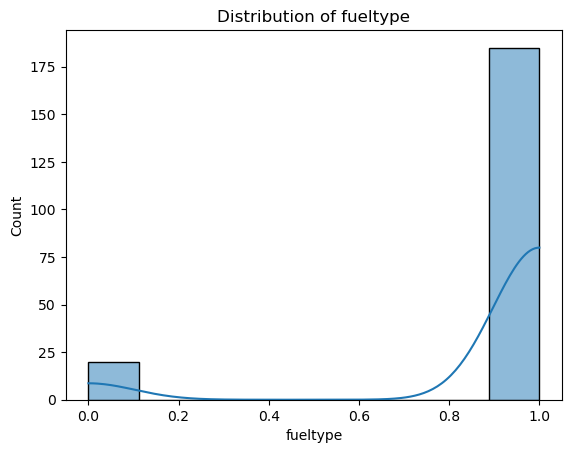

In [56]:
# Check skewness for numerical columns
skewed_feats = df.skew().sort_values(ascending=False)
print("\nSkewness in numerical features:")
print(skewed_feats)

# Optional: Visualize top skewed features
top_skewed = skewed_feats[abs(skewed_feats) > 1].index
for col in top_skewed:
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


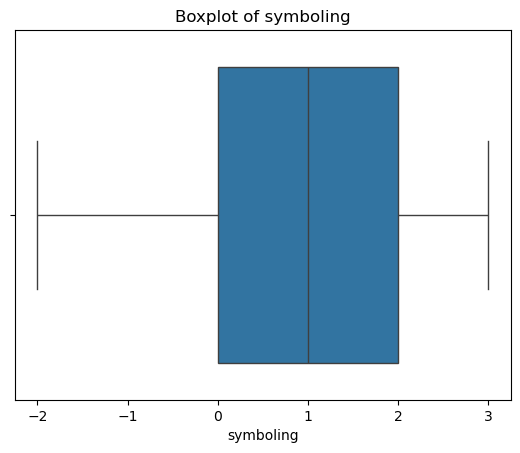

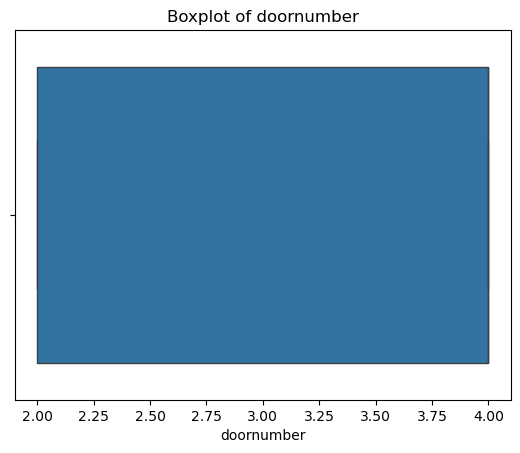

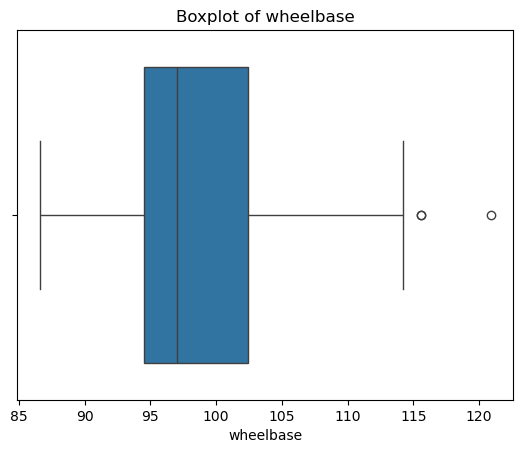

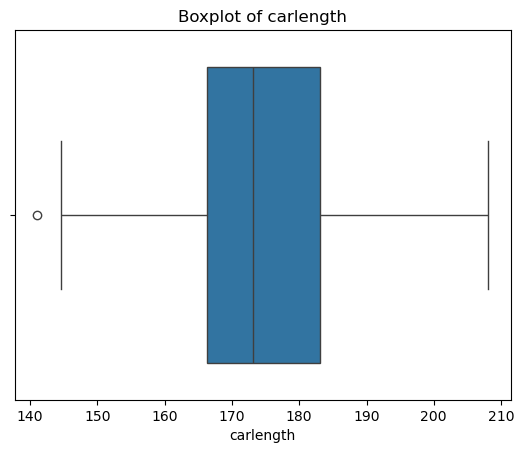

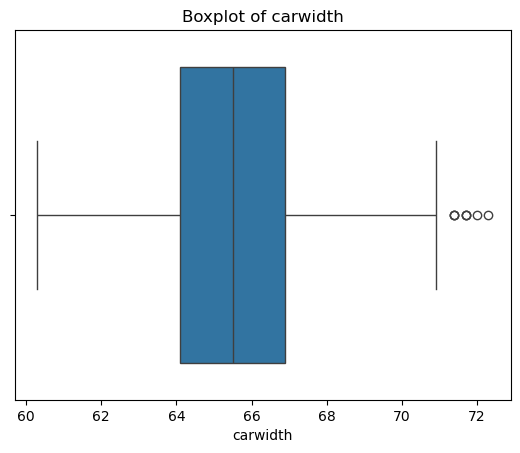

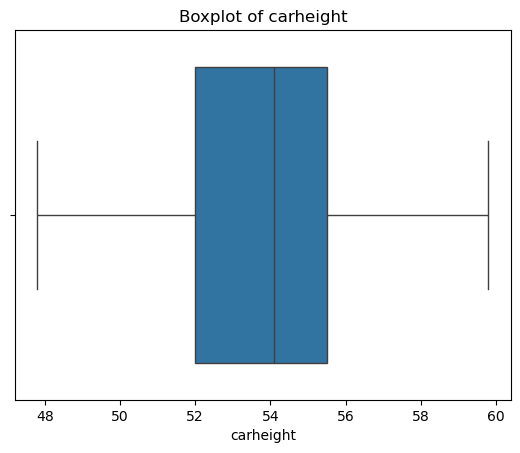

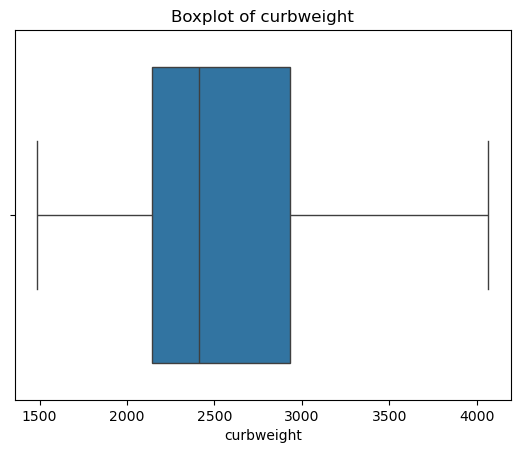

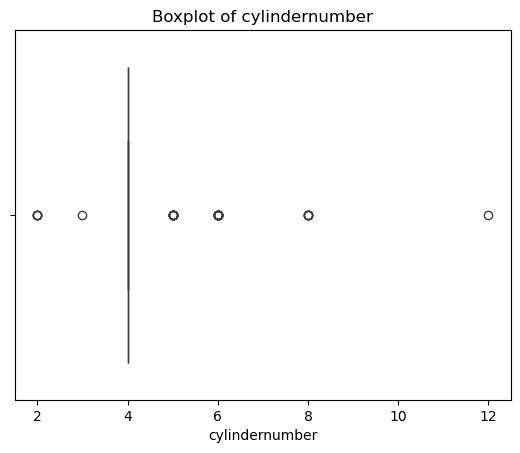

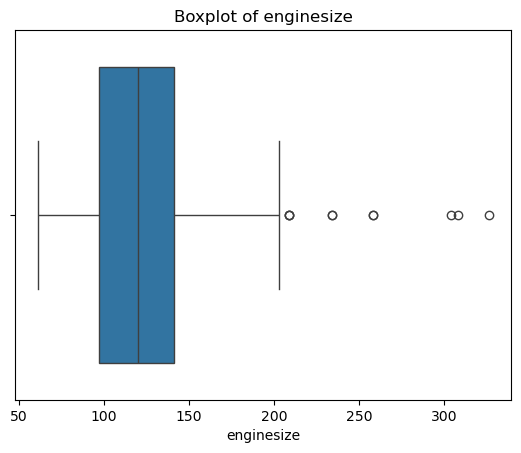

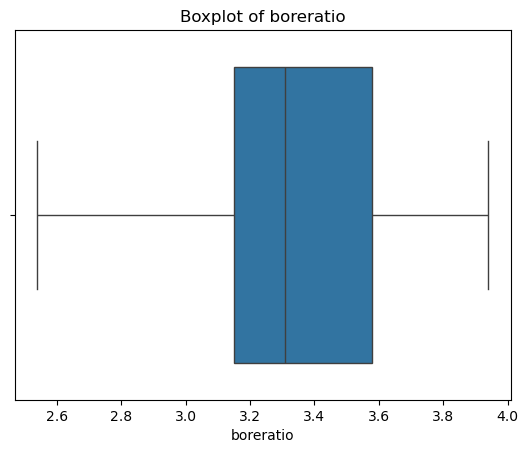

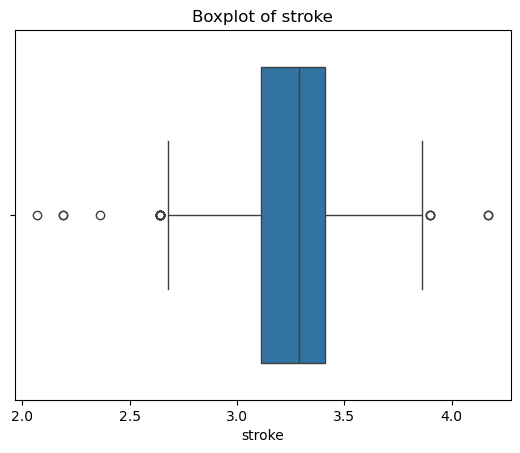

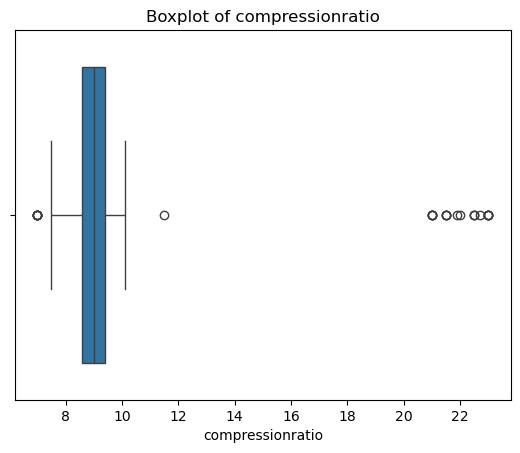

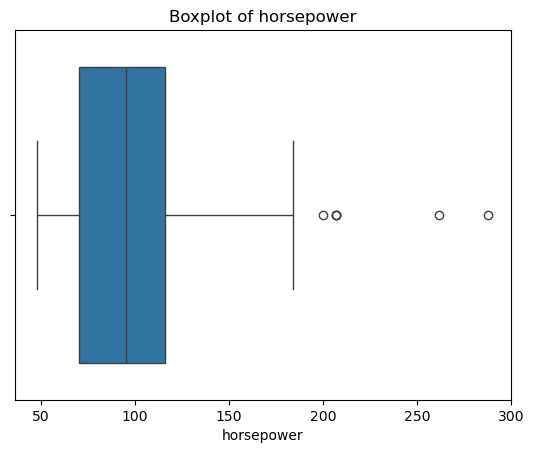

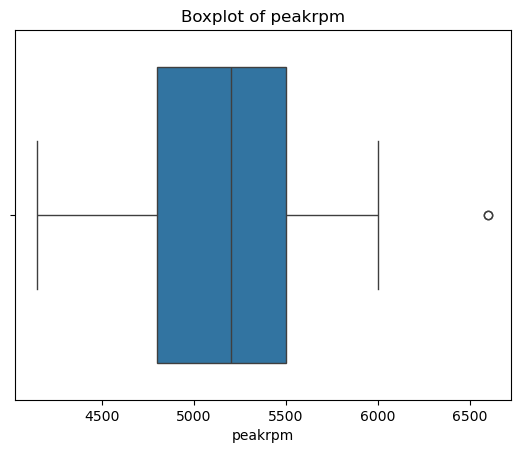

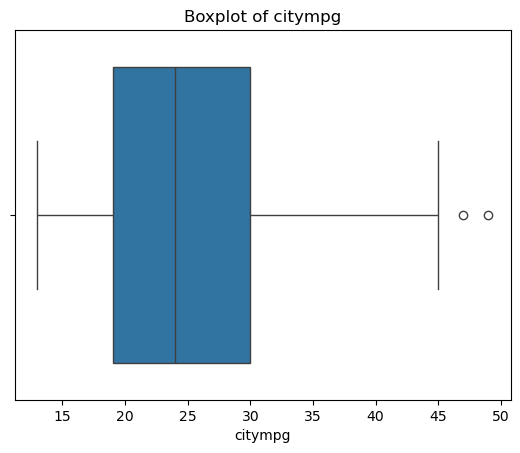

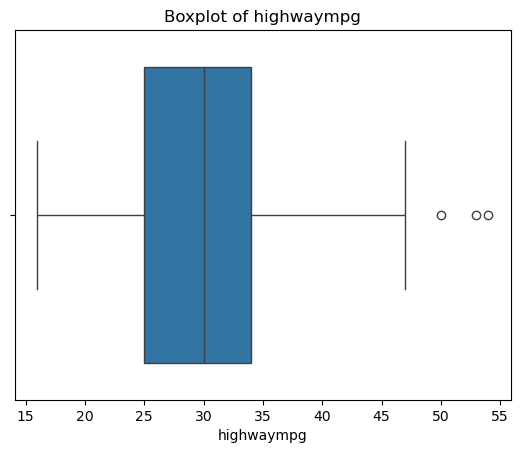

In [57]:
# Boxplots to detect outliers
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in num_cols:
    if col != 'price':
        sns.boxplot(x=df[col])
        plt.title(f'Boxplot of {col}')
        plt.show()


In [59]:
# Optional: Remove or cap outliers using IQR
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] > upper, upper,
              np.where(df[col] < lower, lower, df[col]))


### 7. Label Encoding for Categorical Features
Encodes remaining categorical values (e.g., fueltype, carbody) into numeric labels.

In [60]:
categorical_cols = df.select_dtypes(include='object').columns
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

###  8. Correlation Heatmap
Visualizes relationships between features and the target (price) to spot strong influencers.

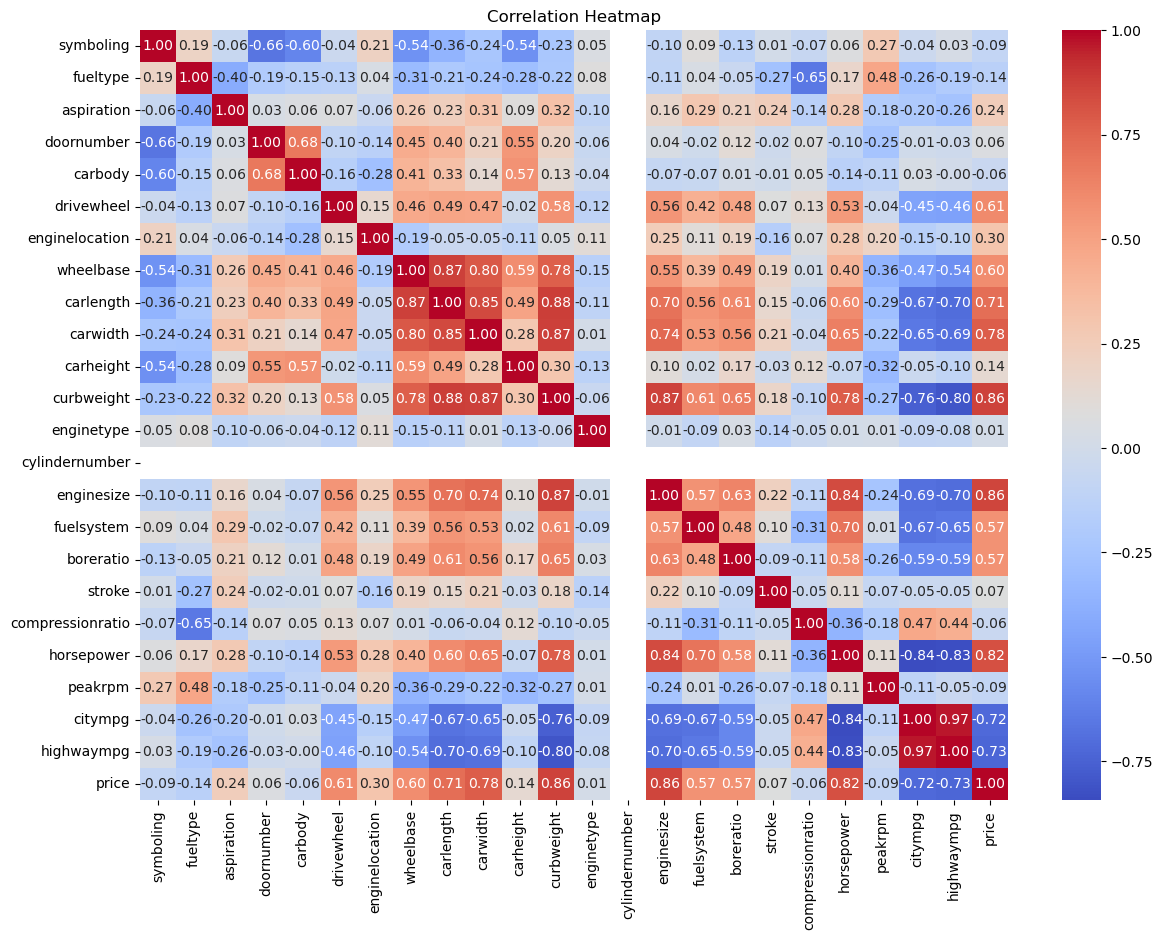

In [61]:
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

### 9. Split Features and Target
X contains features; y is the target variable.

In [62]:
X = df.drop('price', axis=1)
y = df['price']

###  10. Train-Test Split
Splits dataset: 80% for training and 20% for testing.

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

###  11. Feature Scaling
Standardizes the features to have a mean of 0 and variance of 1 — important for models like SVR.

In [64]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 5.Model Building

In [65]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

### 12. Model Definitions
Sets up five different regression models.

In [66]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'SVR': SVR()
}

###  13. Training and Evaluation Loop
Trains each model and evaluates it on the test

In [71]:
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    results.append([name, r2, mse, mae])

# 6. Model Evaluation

### 14. Compare Model Performance
Collects and displays all evaluation metrics to compare models side-by-side.

In [68]:
results_df = pd.DataFrame(results, columns=['Model', 'R2 Score', 'MSE', 'MAE'])
print("\nModel Performance Comparison:")
print(results_df.sort_values(by='R2 Score', ascending=False))


Model Performance Comparison:
               Model  R2 Score           MSE          MAE
3  Gradient Boosting  0.963066  1.956064e+06  1067.505328
2      Random Forest  0.959698  2.134462e+06  1048.171293
1      Decision Tree  0.946255  2.846406e+06  1110.357732
0  Linear Regression  0.840115  8.467793e+06  2220.768679
4                SVR -0.092220  5.784590e+07  5102.400731


# 7.  Feature Importance (from best model - Gradient Boosting)

### 15. Feature Importance Analysis
We use the Gradient Boosting Regressor (best-performing model) to identify which features most significantly affect car prices.

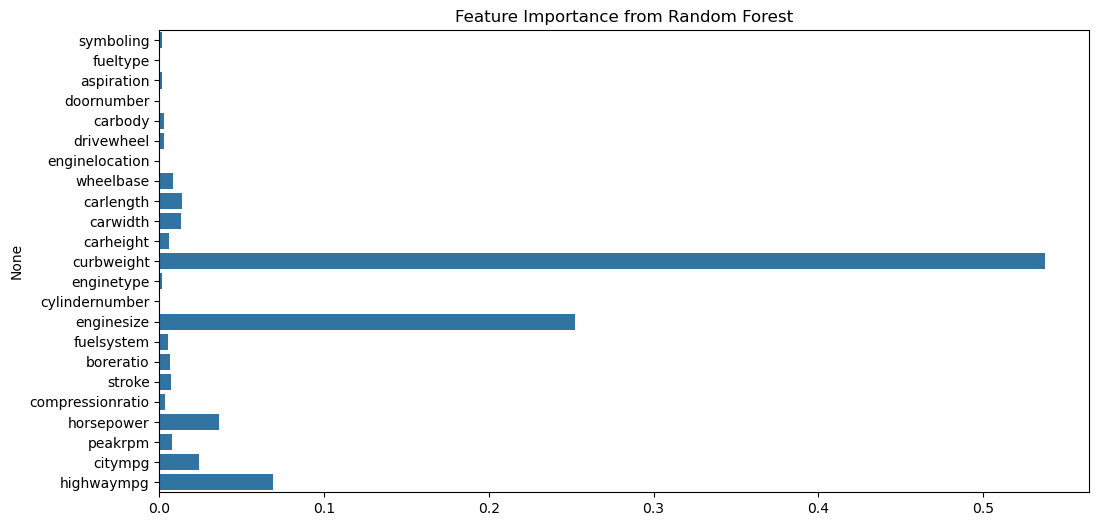

In [69]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
importances = rf.feature_importances_
features = X.columns

plt.figure(figsize=(12, 6))
sns.barplot(x=importances, y=features)
plt.title("Feature Importance from Random Forest")
plt.show()


## We performed feature importance analysis using the Gradient Boosting Regressor, which was the best-performing model.

### Top Significant Features Identified:

- enginesize 🔧 (Engine size has the highest importance — bigger engines usually mean higher prices.)

- horsepower ⚡ (More power typically comes with higher prices.)

- curbweight 🏋️ (Heavier cars may indicate more materials, features, or safety — hence more expensive.)

- carlength, carwidth, carheight 📐 (Size dimensions play a role in pricing.)

- drivewheel, carbody, and fuelsystem 🚗 (Drive type and car category also influence price.)

These features contribute the most to price prediction, helping the consulting team and manufacturer understand what specs push a car into a higher price bracket.

# 8.Hyperparameter Tuning

### 16.  Hyperparameter Tuning
We perform hyperparameter tuning using GridSearchCV to improve model performance further.

In [74]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}


grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)
print("\nBest Parameters:", grid_search.best_params_)

best_rf = grid_search.best_estimator_
y_pred_tuned = best_rf.predict(X_test)
print("Improved R2 Score:", r2_score(y_test, y_pred_tuned))


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Improved R2 Score: 0.9627975227091286


# 9. ✅ Conclusion
## - The best model: **Gradient Boosting Regressor**, with an R² of approximately 0.963.
## - Top influencing features: **enginesize, horsepower, curbweight, carlength, and carwidth**.
## - GridSearchCV improved the model by fine-tuning key parameters.
## - These insights are crucial for the Chinese automobile company to price their cars competitively and align features with US market expectations.